## Implement the Monte Carlo Method to simulate a stock portfolio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [2]:
# import data
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start, end)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    covMatrix = returns.cov()
    return mean_returns, covMatrix

In [3]:
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [5]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
meanReturns

[*********************100%%**********************]  6 of 6 completed


Ticker
BHP.AX    0.000147
CBA.AX    0.001134
NAB.AX    0.001043
STO.AX   -0.000129
TLS.AX   -0.000871
WBC.AX    0.001053
dtype: float64

In [6]:
covMatrix

Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX
Ticker,,,,,,
BHP.AX,0.000153,0.000046,0.000028,0.000041,0.000013,0.000036
CBA.AX,0.000046,0.000086,0.000064,0.000016,0.000028,0.000077
NAB.AX,0.000028,0.000064,0.000092,0.000011,0.000027,0.000079
STO.AX,0.000041,0.000016,0.000011,0.000185,0.000014,0.000009
TLS.AX,0.000013,0.000028,0.000027,0.000014,0.000086,0.000029
WBC.AX,0.000036,0.000077,0.000079,0.000009,0.000029,0.000132


In [7]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

In [8]:
weights

array([0.05208858, 0.29721634, 0.13159944, 0.12036712, 0.29660153,
       0.102127  ])

#### Monte Carlo Method

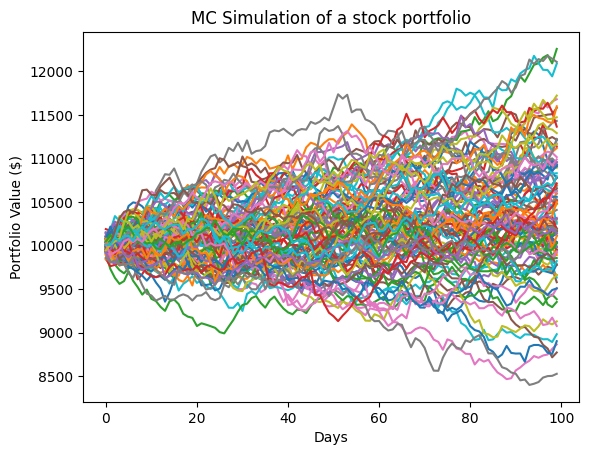

In [10]:
mc_sims = 100
T = 100 # timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value = meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    # MC Loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC Simulation of a stock portfolio')
plt.show()